In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

%config InlineBackend.figure_format='svg'

import numpy as np
from matplotlib import pyplot as plt

from morphing_birds import Hawk3Dtest, plot, interactive_plot, animate




In [28]:
# Stop it printing in scientific notation
np.set_printoptions(suppress=True)

hawk3d = Hawk3Dtest("../data/mean_hawk_shape.csv")
# print(hawk3d.get_polygon_coords("head"))

print(hawk3d.origin)
hawk3d.transform_keypoints(horzDist=2)

print(hawk3d.get_polygon_coords("head"))

hawk3d.restore_keypoints()

# print(hawk3d.current_shape)
# print(hawk3d.get_polygon_coords("left_handwing"))

interactive_plot(hawk3d)



[0. 0. 0.]
[[ 0.06        2.06       -0.045     ]
 [ 0.00003743  2.07050025 -0.06170237]
 [-0.06        2.06       -0.045     ]]
No axes given, creating new figure inside interactive_plot.


IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

In [10]:
np.mean(hawk3d.get_polygon_coords("body"), axis=0)

array([ 0.        ,  0.79808081, -0.025     ])

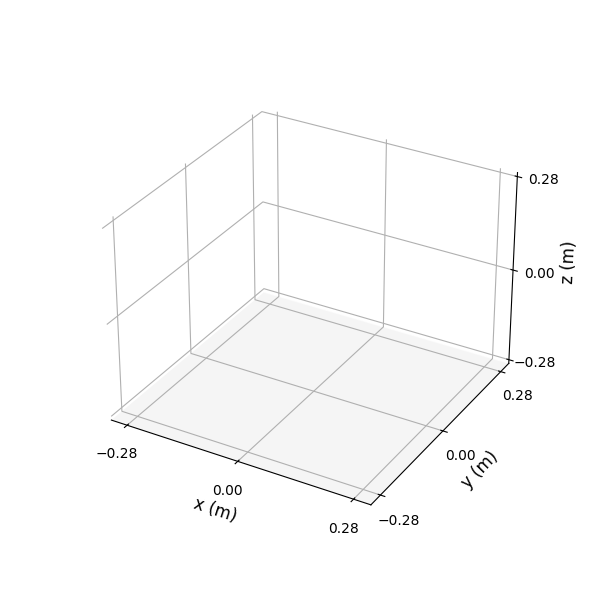

In [33]:
# Create fake keypoints by taking the default shape, adding some noise per frame (n,4,3) where 

# n is the number of frames, 4 is the number of keypoints, 3 is the number of coordinates per keypoint

# fake_keypoints = np.random.normal(0, 0.01, (100,4,3)) + hawk3d.right_markers

fake_horz = np.linspace(10,0,100)
fake_vert = np.linspace(0,3,100)
fake_rot = np.linspace(0, 30, 100)
# print(fake_horz)


animate(hawk3d, fake_keypoints, horzDist_frames=fake_horz, bodypitch_frames=fake_rot)




In [27]:
plt.close()

In [ ]:
data = HawkDataTest("../data/2024-03-24-FullUnilateralMarkers.csv")
# data = HawkDataTest("../data/2024-03-24-FullBilateralMarkers.csv")





In [ ]:

HawkPCA = HawkPCATest(data)
HawkPCA.run_pca()
HawkPCA.scores.shape

In [ ]:
scoreframes = HawkPCA.get_score_range()

In [ ]:
reconstructed_markers = HawkPCA.reconstruct(components_list=[0])
print(reconstructed_markers[0].shape)

In [30]:
# Clear figures from memory
plt.close('all')


In [ ]:

hawk3d.update_keypoints(reconstructed_markers[15])
hawkplot = HawkPlotterTest(hawk3d)
HawkAnimate = HawkAnimatorTest(hawk3d, hawkplot)

reconstructed_markers = HawkPCA.reconstruct(components_list=[0])
HawkAnimate.animate(reconstructed_markers)

# _ = hawkplot.interactive_plot()


## Attempting to reconstruct all the data to plot it in 3d


In [ ]:
data = HawkDataTest("../data/2024-03-24-FullUnilateralMarkers.csv")
HawkPCA = HawkPCATest(data)
HawkPCA.run_pca()
scores = HawkPCA.scores

In [ ]:
reconstructed_markers = HawkPCA.reconstruct(score_frames=scores)
reconstructed_markers.shape

# Plot original data
using 3 panels: xy, xz, yz

In [ ]:
# %matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from morphing_birds import Hawk3Dtest, HawkPlotterTest, HawkAnimatorTest, HawkDataTest, HawkPCATest
import holoviews as hv
from holoviews.operation.datashader import datashade
from holoviews import opts, dim
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import Greys9
from datashader.colors import Elevation
from datashader.utils import export_image
import pandas as pd
from functools import partial

# hv.extension("matplotlib")

Greys9_r = list(reversed(Greys9))[:-2]

data = HawkDataTest("../data/2024-03-24-FullUnilateralMarkers.csv")
HawkPCA = HawkPCATest(data)
HawkPCA.run_pca()



In [ ]:
%matplotlib widget
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axs array for easier access
axes = axs.flatten()

filter_data = data.filter_by(birdID=4)
toothless_data = data.markers[filter_data]
col_names = ["x","y","z"]

marker_id = 0
toothless_data = toothless_data[:,marker_id,:]
toothless_pd = pd.DataFrame(toothless_data, columns=col_names)

scores = HawkPCA.scores
PC_list = [0,1,2]
# PC_list = [0,1,2,3,4,5,6,7,8,9,10,11]

reconstructed = HawkPCA.reconstruct(components_list=PC_list,score_frames=scores)
toothless_reconstructed = reconstructed[filter_data]

toothless_reconstructed = toothless_reconstructed[:,marker_id,:]
toothless_reconstructed_pd = pd.DataFrame(toothless_reconstructed, columns=col_names)
print(toothless_reconstructed_pd.shape)

bounds = dict(x_range=(-0.6, 0.6), y_range=(-0.65, 0.65))
cvs = ds.Canvas(plot_width=500, plot_height=500, **bounds)

x_values = ["x", "x", "y"]
y_values = ["y", "z", "z"]

# Loop through each subplot axes
for ii, ax in enumerate(axes):
    if ii < 3:
        # For demonstration, using the same 'toothless_pd' for each subplot
        # In practice, you may have different datasets or parameters per subplot
        agg = cvs.points(toothless_pd, x_values[ii], y_values[ii], ds.count())
        img = tf.shade(agg, cmap=["white", "black"], how='log')

    if ii > 2 and ii < 6:
        agg = cvs.points(toothless_reconstructed_pd, x_values[ii-3], y_values[ii-3], ds.count())
        img = tf.shade(agg, cmap=["white", "black"], how='log')


    if ii > 5:
        agg1 = cvs.points(toothless_pd, x_values[ii-6], y_values[ii-6], ds.count())
        agg2 = cvs.points(toothless_reconstructed_pd, x_values[ii-6], y_values[ii-6], ds.count())
        img1 = tf.shade(agg1, cmap=["blue"], how='log', alpha=128)
        img2 = tf.shade(agg2, cmap=["red"], how='log')

        # Combine the two images into a single image
        img = tf.stack(img2, img1)

    img = tf.set_background(img, 'white')
    
    # Convert the Datashader image to a NumPy array and display in subplot
    img_array = np.array(img.to_pil())
    ax.imshow(img_array)
    ax.axis('off')  # Turn off axis for cleaner look

# Adjust subplot layout for aesthetics
plt.tight_layout()
plt.show()



# agg = cvs.points(toothless_pd, 'x', 'z', ds.count())
# img = tf.shade(agg, cmap= ["white", "black"], how='log')
# display(tf.set_background(img, 'white'))

# # using cvs on a numpy array without column names



## Show all possible combinations of 2 standard deviations of the scores



In [ ]:
scores = HawkPCA.scores
st_dev = np.std(scores,axis=0)
st_dev.shape

# Create a numpy array linspace going from -2 to 2 standard deviations
# with 20 points
num_points = 20
PC_1 = np.linspace(-2*st_dev[0], 2*st_dev[0], num_points)
PC_2 = np.linspace(-2*st_dev[1], 2*st_dev[1], num_points)
# PC_3 = np.linspace(-2*st_dev[2], 2*st_dev[2], num_points)

# Create a large matrix with all possible combinations of PC_1 and PC_2
PC_1, PC_2 = np.meshgrid(PC_1, PC_2)

# Create a 2D array with the PC_1 and PC_2 values
PC_1_2D = PC_1.flatten()
PC_2_2D = PC_2.flatten()
# PC_3_2D = PC_3.flatten()


# Concatenate both to a 2D array
combined = np.vstack((PC_1_2D, PC_2_2D)).T
print(combined.shape)

# For every remaining column up to 12, add 0s
for ii in range(combined.shape[1],12):
    combined = np.hstack((combined, np.zeros((combined.shape[0],1))))


# Repeat the combined array for the number of frames
nPoints = toothless_pd.shape[0]
combined = np.repeat(combined, nPoints, axis=0)
combined.shape


In [ ]:
%matplotlib widget

# Now we can reconstruct the markers for all possible combinations
reconstructed = HawkPCA.reconstruct(components_list=[0,1], score_frames=combined)
print(reconstructed.shape)

# Now we can plot the reconstructed markers
marker_id = 0
reconstructed = reconstructed[:,marker_id,:]
reconstructed_pd = pd.DataFrame(reconstructed, columns=col_names)
print(reconstructed_pd.shape)

bounds = dict(x_range=(-0.6, 0.6), y_range=(-0.65, 0.65))
cvs = ds.Canvas(plot_width=500, plot_height=500, **bounds)

x_values = ["x", "x", "y"]
y_values = ["y", "z", "z"]


fig, axs = plt.subplots(3, 3, figsize=(3, 2))

# Flatten the axs array for easier access
axes = axs.flatten()

# Loop through each subplot axes
for ii, ax in enumerate(axes):
    if ii < 3:
        # For demonstration, using the same 'toothless_pd' for each subplot
        # In practice, you may have different datasets or parameters per subplot
        agg = cvs.points(toothless_pd, x_values[ii], y_values[ii], ds.count())
        img = tf.shade(agg, cmap=["white", "black"], how='log')

    if ii > 2 and ii < 6:
        agg = cvs.points(reconstructed_pd, x_values[ii-3], y_values[ii-3], ds.count())
        img = tf.shade(agg, cmap=["white", "black"], how='linear')


    if ii > 5:
        agg1 = cvs.points(toothless_pd, x_values[ii-6], y_values[ii-6], ds.count())
        agg2 = cvs.points(reconstructed_pd, x_values[ii-6], y_values[ii-6], ds.count())
        img1 = tf.shade(agg1, cmap=["blue"], how='log', alpha=128)
        img2 = tf.shade(agg2, cmap=["red"], how='eq_hist')

        # Combine the two images into a single image
        img = tf.stack(img2, img1)

    img = tf.set_background(img, 'white')
    
    # Convert the Datashader image to a NumPy array and display in subplot
    img_array = np.array(img.to_pil())
    ax.imshow(img_array)
    ax.axis('off')  # Turn off axis for cleaner look

# Adjust subplot layout for aesthetics
plt.tight_layout()
plt.show()




In [ ]:
selection = data.filter_by(hawkname="Toothless",
                      perchDist=9)
selection

data.markers[selection].shape

In [ ]:
# print(hawk3d.markers)

# # Stop python printing in scientific notation
# np.set_printoptions(suppress=True)
# # Make a numpy array of 1s in the shape [1,4,3]
# a = np.ones((1,4,3))*100


# # See if update works
# hawk3d.update_keypoints(a)
# hawk3d.markers
# hawk3d.right_markers

# # # See if restore works
# hawk3d.restore_keypoints()
# hawk3d.markers
# hawk3d.right_markers


In [ ]:
hawkplot = HawkPlotterTest(hawk3d)

hawkplot.plot()



In [ ]:
# Create an array of [100,4,3] to see if the animation works
keypoint_frames = hawk3d.markers

# Now repeat keypoint_frames 100 times
keypoint_frames = np.repeat(keypoint_frames, 5, axis=0)

# Then add a little noise to the keypoint_frames
keypoint_frames += np.random.randn(*keypoint_frames.shape)*0.02

print(keypoint_frames.shape)

# hawk_animator = HawkAnimatorTest(hawk3d, hawkplot)

# hawk_animator.HawkPlotter.interactive_plot(keypoint_frames[0])
# print(keypoint_frames[0].shape)
hawk3d.update_keypoints(keypoint_frames[0])
print(keypoint_frames[0])
print(hawk3d.right_markers)

# HawkPlotterTest(hawk3d).interactive_plot()

# HawkAnimate = HawkAnimatorTest(hawk3d, hawkplot)

# animation = HawkAnimate.animate(keypoint_frames)

# new_hawkplot = HawkPlotterTest(new_hawk3d)
# new_hawkplot.interactive_plot()

# display(animation)



In [ ]:
# stop the animation
animation.event_source.stop()

## Load DMD results


In [ ]:
plt.close('all')


In [ ]:
# animation.event_source.stop()
plt.close('all')

dynamicsMode = np.load("../data/dynamics/Mode1.npy")



# dynamicsMode = np.load("../data/dynamics/FlightDynamics.npy")


hawk3d = Hawk3Dtest("../data/mean_hawk_shape.csv")

hawkplot = HawkPlotterTest(hawk3d)

HawkAnimate = HawkAnimatorTest(hawk3d, hawkplot)

# Grab every other starting with the second
right_dynamicsMode = dynamicsMode[0:50,1::2,:]

# Reverse the x axis just in case
# right_dynamicsMode[:,:,0] = -right_dynamicsMode[:,:,0]

# Reverse the left side of the full results as this hasn't been done
# Reverse the x axis for the left side -- every other starting with the first
# dynamicsMode[:,0::2,0] = -dynamicsMode[:,0::2,0]

# Add some scaling
# right_dynamicsMode *= 0.8

# right_dynamicsMode *= 80


print(right_dynamicsMode.shape)

# Add it to the average shape
average_shape = hawk3d.default_right_markers

# average_shape_full = hawk3d.default_markers

# Repeat it for the number of frames
average_shape = np.repeat(average_shape, right_dynamicsMode.shape[0], axis=0)

right_dynamicsMode = right_dynamicsMode + average_shape

animation = HawkAnimate.animate(right_dynamicsMode,az=20,colour="darkmagenta")





# plt.rcParams['animation.convert_path'] = '/opt/homebrew/bin/magick'
# animation.save('../gif_results/combined_side.gif', writer='imagemagick', fps=5,dpi=200)






# animation = HawkAnimate.animate(dynamicsMode,az=40)



## Just plot the wingbeat from the data


In [ ]:
plt.close('all')
single_wingbeat = np.load("../data/dynamics/wingbeat_measurement.npy")

single_wingbeat = single_wingbeat.T
print(single_wingbeat.shape)

# Grab every other starting with the second
right_single_wingbeat = single_wingbeat[:,1::2]


# Reshape to be [-1,4,3]
right_single_wingbeat = right_single_wingbeat.reshape(-1,4,3)
single_wingbeat = single_wingbeat.reshape(-1,8,3)
print(right_single_wingbeat.shape)

# Reverse the x axis for every other starting with the first
single_wingbeat[:,0::2,0] = -single_wingbeat[:,0::2,0]


# Add it to the average shape
average_shape = hawk3d.default_right_markers
average_shape_full = hawk3d.default_markers

# Repeat it for the number of frames
average_shape = np.repeat(average_shape, right_single_wingbeat.shape[0], axis=0)
average_shape_full = np.repeat(average_shape_full, single_wingbeat.shape[0], axis=0)

right_single_wingbeat = right_single_wingbeat + average_shape
single_wingbeat = single_wingbeat + average_shape_full

# Stack the array multiple times, such that it runs all the way through and then restarts
# I can't use np.repeat as that will just repeat the same frame multiple times
# Instead I need to stack the array multiple times


# animation = HawkAnimate.animate(right_single_wingbeat,az=40,colour='firebrick')
animation = HawkAnimate.animate(single_wingbeat,az=20,colour='firebrick')

plt.rcParams['animation.convert_path'] = '/opt/homebrew/bin/magick'
animation.save('../gif_results/actual_data_wingbeat_side.gif', writer='imagemagick', fps=10,dpi=200)






In [ ]:
print(dynamicsMode)